# Data Scientist Professional Practical Exam Submission

**Use this template to write up your summary for submission. Code in Python or R needs to be included.**


## 📝 Task List

Your written report should include both code, output and written text summaries of the following:
- Data Validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Model Development
  - Include your reasons for selecting the models you use as well as a statement of the problem type
  - Code to fit the baseline and comparison models
- Model Evaluation
  - Describe the performance of the two models based on an appropriate metric
- Business Metrics
  - Define a way to compare your model performance to the business
  - Describe how your models perform using this approach
- Final summary including recommendations that the business should undertake

*Start writing report here..*

# Explonatory Data Analysis
## Data Validatiion


In [84]:
# data manipulation
import pandas as pd
import numpy as np

# data visualization
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")

# ML tools
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, \
                                cross_val_score, validation_curve

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import precision_score, classification_report, confusion_matrix

Now we will read our data from a .csv file and explore the data on hand. The purpose is to understand the dataset, clean and validate the data to identify possible feature engineering opportunities.

In [85]:
# load in the dataset
df = pd.read_csv('recipe_site_traffic_2212.csv', index_col='recipe')

df.head(3)

,calories,carbohydrate,sugar,protein,category,servings,high_traffic
recipe,,,,,,,
1,NaN,NaN,NaN,NaN,Pork,6,High
2,35.48,38.56,0.66,0.92,Potato,4,High
3,914.28,42.68,3.09,2.88,Breakfast,1,NaN


In [86]:
print("Dataset has {} samples and {} features".format(*df.shape))

Dataset has 947 samples and 7 features


We have 6 features (recipe set as index) and a target variable **high_traffic**.

Calories, carbohydrate, sugar, protein, servings suppose to be **continuous** variables while category is a **Categorical** feature.

In [87]:
# missing data and dtype of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 947 entries, 1 to 947
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   calories      895 non-null    float64
 1   carbohydrate  895 non-null    float64
 2   sugar         895 non-null    float64
 3   protein       895 non-null    float64
 4   category      947 non-null    object 
 5   servings      947 non-null    object 
 6   high_traffic  574 non-null    object 
dtypes: float64(4), object(3)
memory usage: 59.2+ KB


To begin with, features are need to be validated with the provided instructions (the range of values, dtypes).

In [88]:
# statistics of each column
df.describe(include='all')

,calories,carbohydrate,sugar,protein,category,servings,high_traffic
count,895.000000,895.000000,895.000000,895.000000,947,947,574
unique,NaN,NaN,NaN,NaN,11,6,1
top,NaN,NaN,NaN,NaN,Breakfast,4,High
freq,NaN,NaN,NaN,NaN,106,389,574
mean,435.939196,35.069676,9.046547,24.149296,NaN,NaN,NaN
std,453.020997,43.949032,14.679176,36.369739,NaN,NaN,NaN
min,0.140000,0.030000,0.010000,0.000000,NaN,NaN,NaN
25%,110.430000,8.375000,1.690000,3.195000,NaN,NaN,NaN
50%,288.550000,21.480000,4.550000,10.800000,NaN,NaN,NaN
75%,597.650000,44.965000,9.800000,30.200000,NaN,NaN,NaN


There are some problems with the data:
* Category column contains 11 unique values instead of 10;
* Servings column should be numerical;
* High_traffic column has NaN for not high-traffic meals.

In [89]:
# finding an extra type of recipe
df['category'].value_counts(dropna=False)

Breakfast         106
Chicken Breast     98
Beverages          92
Lunch/Snacks       89
Potato             88
Pork               84
Vegetable          83
Dessert            83
Meat               79
Chicken            74
One Dish Meal      71
Name: category, dtype: int64

_Chicken Breast_ is a type of recipe that does not provided with instructions. Category 'Chicken Breast' can be replaced with 'Chiken' one.

In [90]:
# changing category 'Chicken Breast' to the 'Chicken'
df['category'] = df['category'].str.replace('Chicken Breast', 'Chicken')
df['category'] = df['category'].astype('category')

# rechecking the categories
df['category'].value_counts(dropna=False)

Chicken          172
Breakfast        106
Beverages         92
Lunch/Snacks      89
Potato            88
Pork              84
Dessert           83
Vegetable         83
Meat              79
One Dish Meal     71
Name: category, dtype: int64

Before converting 'servings' column to the numerical type we need to check the data it contains.

In [91]:
df['servings'].value_counts(dropna=False)

4               389
6               197
2               183
1               175
4 as a snack      2
6 as a snack      1
Name: servings, dtype: int64

Need to remove extra char symbols ' as a snack' and chanhe the column dtype.

In [92]:
df['servings'] = df['servings'].str.replace(' as a snack', '')
df['servings'] = df['servings'].astype('int')

df['servings'].value_counts(dropna=False)

4    391
6    198
2    183
1    175
Name: servings, dtype: int64

The column of high_traffic provide values only for dishes with high traffic (string 'High') and NaN otherwise. So, the NaN data is not really missing, it just shows low traffic. 

In [93]:
df['high_traffic'] = df['high_traffic'].fillna('Low')
df['high_traffic'] = df['high_traffic'].astype('category')

df['high_traffic'].value_counts(dropna=False)

High    574
Low     373
Name: high_traffic, dtype: int64

## Missing Values

From that moment all columns are in the correct dtype. To continue, some **missing data** exist in calories, carbohydrate, sugar, protein columns. There are _52_ rows (5,5% of the data) that has null values in those columns. As we cannot impute missing data because the values for each category vary significantly depending on receipe (ingridiends), we will drop that rows. New data consist of 895 rows and has no missing values.

In [94]:
df_cleaned = df.dropna()

df_cleaned['category'] = df_cleaned['category'].astype('category')
df_cleaned['category'] = df_cleaned['category'].astype('category')

df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 895 entries, 2 to 947
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   calories      895 non-null    float64 
 1   carbohydrate  895 non-null    float64 
 2   sugar         895 non-null    float64 
 3   protein       895 non-null    float64 
 4   category      895 non-null    category
 5   servings      895 non-null    int64   
 6   high_traffic  895 non-null    category
dtypes: category(2), float64(4), int64(1)
memory usage: 44.2 KB


## Outliers

If take a look at the calories distribution, many outliries will be seen. Lets exlude recipes (for each category) that calory values are out of 0.975 quantile.

In [95]:
df_cleaned.describe()

,calories,carbohydrate,sugar,protein,servings
count,895.000000,895.000000,895.000000,895.000000,895.000000
mean,435.939196,35.069676,9.046547,24.149296,3.458101
std,453.020997,43.949032,14.679176,36.369739,1.735979
min,0.140000,0.030000,0.010000,0.000000,1.000000
25%,110.430000,8.375000,1.690000,3.195000,2.000000
50%,288.550000,21.480000,4.550000,10.800000,4.000000
75%,597.650000,44.965000,9.800000,30.200000,4.000000
max,3633.160000,530.420000,148.750000,363.360000,6.000000


There is an example of outlier: extreme number of calories and a few protein/sugar/carbohydrate values. It must be a wrong information.

In [96]:
df_cleaned.loc[[926]]

,calories,carbohydrate,sugar,protein,category,servings,high_traffic
recipe,,,,,,,
926,3633.16,29.07,0.35,2.32,Chicken,4,Low


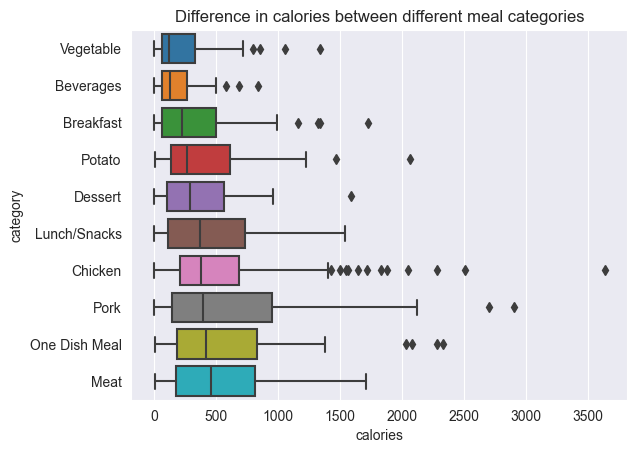

In [97]:
g = sns.boxplot(
    y='category', 
    x='calories', 
    data=df_cleaned,
    order=df_cleaned.groupby('category')['calories'] \
        .median().sort_values().reset_index()['category'])

g.set_title('Difference in calories between different meal categories');

In [98]:
# adding a new column with a .975 percentile for recipe's category
df_cleaned['category_quant(.975)'] = df_cleaned.groupby('category')["calories"] \
                                    .transform(lambda x: x.quantile(0.975))

# drop values where calories > .975 percentile of calories
df_cleaned = df_cleaned[df_cleaned['calories'] <= df_cleaned['category_quant(.975)']]
df_cleaned = df_cleaned.drop('category_quant(.975)', axis=1)
# 27 outliers were dropped
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 868 entries, 2 to 947
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   calories      868 non-null    float64 
 1   carbohydrate  868 non-null    float64 
 2   sugar         868 non-null    float64 
 3   protein       868 non-null    float64 
 4   category      868 non-null    category
 5   servings      868 non-null    int64   
 6   high_traffic  868 non-null    category
dtypes: category(2), float64(4), int64(1)
memory usage: 42.9 KB


# Data Visualization

First of all, we want to understand what is the propotion of high-traffic and not high-traffic recipes. The count plot shows that ~60% (517 of 868) of the recipes in the dataset lead to high traffic on the site.

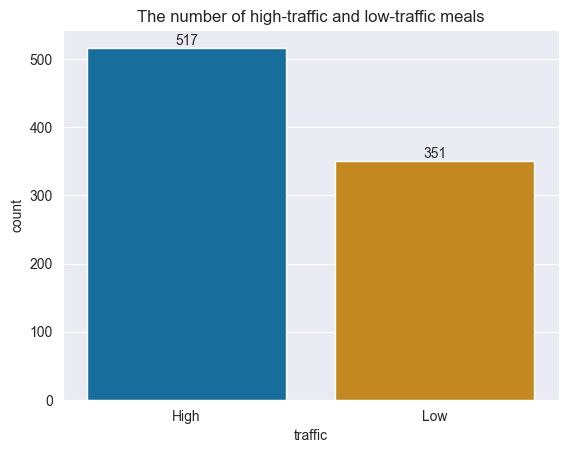

In [99]:
g = sns.countplot(
    x='high_traffic', 
    data=df_cleaned,
    palette=sns.color_palette("colorblind")
)

# xtick settings
g.set_xticklabels(['High', 'Low'])
g.set(xlabel='traffic')
# values on the top of the bars
g.bar_label(g.containers[0])

g.set_title('The number of high-traffic and low-traffic meals');

Also we need to know how calories of recipes are distributed. That histogram shows that most meals have less than 1000 calories.

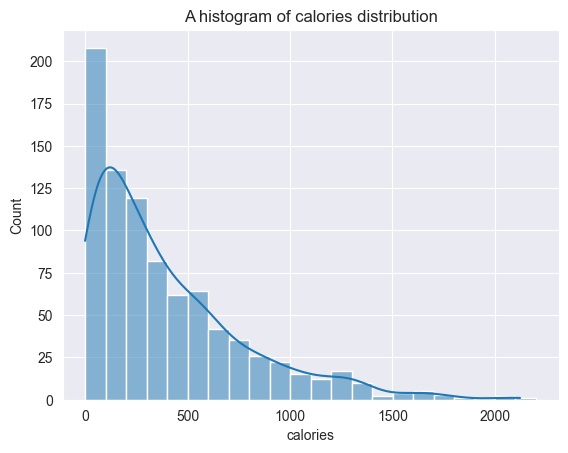

In [101]:
g = sns.histplot(
    x='calories', 
    data=df_cleaned, 
    kde=True,
    binwidth=100
)

g.set_title('A histogram of calories distribution');

Then we will use bar chart to talk about the relationship between calories and the category of a recipe. There are far fewer outliers now.

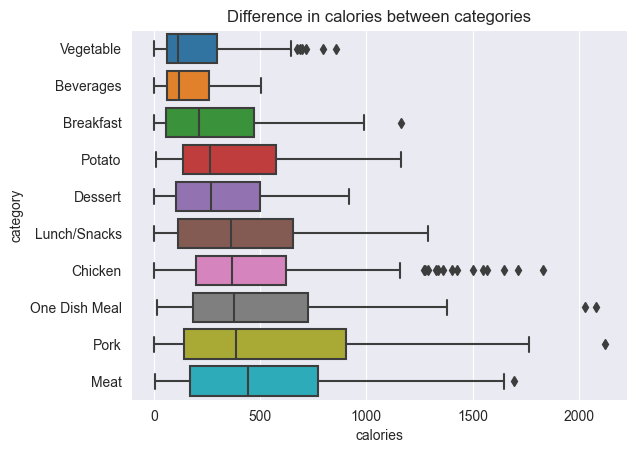

In [102]:
g = sns.boxplot(
    y='category', 
    x='calories', 
    data=df_cleaned,
    order=df_cleaned.groupby('category')['calories'] \
        .median().sort_values().reset_index()['category'])

g.set_title("Difference in calories between categories");

Let's split the bars by 'high_traffic' feature and see if there is any correlation between high traffic meals and calories. As we can see for some categories high-traffic meals provide more calories while for other categories the situation is opposite.

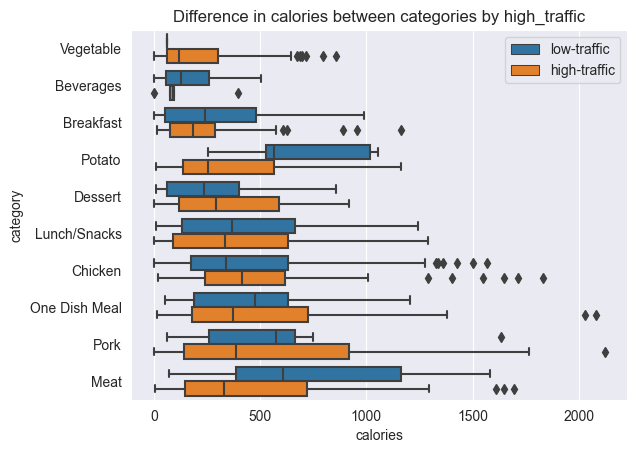

In [138]:
g = sns.boxplot(
    y='category', 
    x='calories',
    hue='high_traffic',
    data=df_cleaned,
    order=df_cleaned.groupby('category')['calories'] \
        .median().sort_values().reset_index()['category'])

g.set_title("Difference in calories between categories by high_traffic");
handles, _ = g.get_legend_handles_labels()
g.legend(handles, ["low-traffic", "high-traffic"])

So, we can look at the common relationship between calories and traffic (without categories). It says that more caloried recipes tend to provide more traffic to the site.

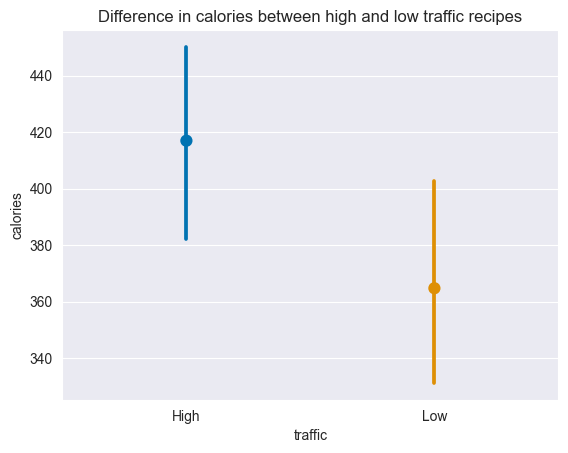

In [100]:
g = sns.pointplot(
    x='high_traffic',
    y='calories',
    data=df_cleaned,
    palette=sns.color_palette("colorblind")
)

# xtick settings
g.set_xticklabels(['High', 'Low'])
g.set(xlabel='traffic')

g.set_title('Difference in calories between high and low traffic recipes');handles

In [103]:
# converting 'high_traffic' column to numeric format
df_cleaned['high_traffic'] = np.where(df_cleaned['high_traffic'] == 'High', 1, 0)

The proportion of high-traffic meals through categories is not uniform. Some categories as 'vegetable', 'potato' and 'pork' have a lot of high-traffic meals, while 'chiken', 'breakfast' and 'beverages' recipes are not popular at all.

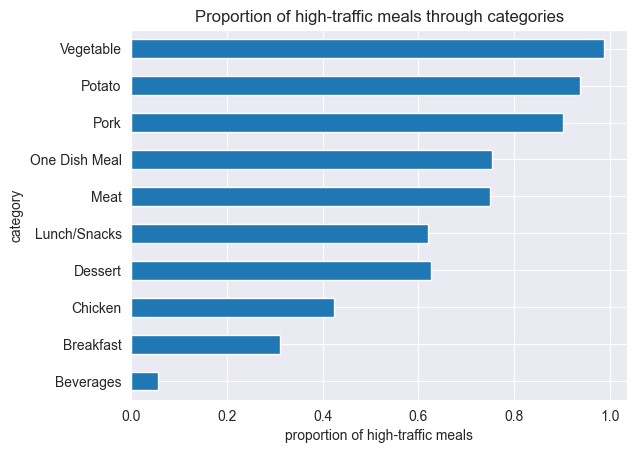

In [104]:
g = df_cleaned.groupby('category')['high_traffic'].mean().plot(kind='barh')
g.set(xlabel='proportion of high-traffic meals')
g.set_title('Proportion of high-traffic meals through categories');

# Machine Learning

There is a problem of classification - we have two classes (high and low traffic recipes) and need to fit a model that performs well on our data. As the task is to correctly predict high traffic recipes 80% of the time and minimizing the chance of showing unpopular recipes - our metrics should be a precision(a measure of quality). This metrics minimizes false positive errors (showing npopular recipes). The perfomance of 3 models (KNN, Decision tree and Random Forest) will be compared.

## Data Preparing

Machine learning models work only with numerical data, so we need to remove all categorical columns. The best way to perform that is to make dummies of categorical columns with pd.get_dummies() function.

In [105]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 868 entries, 2 to 947
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   calories      868 non-null    float64 
 1   carbohydrate  868 non-null    float64 
 2   sugar         868 non-null    float64 
 3   protein       868 non-null    float64 
 4   category      868 non-null    category
 5   servings      868 non-null    int64   
 6   high_traffic  868 non-null    int64   
dtypes: category(1), float64(4), int64(2)
memory usage: 48.7 KB


In [106]:
df_prepared = pd.get_dummies(df_cleaned)

# 10 columns of 10 unique categories were added, original 'catefiry' column was dropped
df_prepared.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 868 entries, 2 to 947
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   calories                868 non-null    float64
 1   carbohydrate            868 non-null    float64
 2   sugar                   868 non-null    float64
 3   protein                 868 non-null    float64
 4   servings                868 non-null    int64  
 5   high_traffic            868 non-null    int64  
 6   category_Beverages      868 non-null    uint8  
 7   category_Breakfast      868 non-null    uint8  
 8   category_Chicken        868 non-null    uint8  
 9   category_Dessert        868 non-null    uint8  
 10  category_Lunch/Snacks   868 non-null    uint8  
 11  category_Meat           868 non-null    uint8  
 12  category_One Dish Meal  868 non-null    uint8  
 13  category_Pork           868 non-null    uint8  
 14  category_Potato         868 non-null    ui

Another ML requirement for data is to be scaled. We have already imported StandardScaler from sklearn.preprocessing module. In the interest of preventing information about the distribution of the test set leaking into our models, we will firstly split the data into train and test parts and fit the scaler the training data only.

In [107]:
# features and target variable
y = df_prepared['high_traffic']
X = df_prepared.drop('high_traffic', axis=1)

X.shape, y.shape

((868, 15), (868,))

In [156]:
# splitting the data
X_train, X_test, y_train, y_test = train_test_split(
                                        X, y,
                                        test_size=0.3,
                                        random_state=1,
                                        stratify=y)

X_test_ind = list(X_test.index)
X_train.shape, X_test.shape

((607, 15), (261, 15))

In [109]:
# scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform (X_test)

## KNN Model
At first, let's look at the KNN model perfomance with different hyperparameters.

In [110]:
param_range = range(2, 200)

knn_train_score, knn_test_score = validation_curve(KNeighborsClassifier(),
                                           X_train, y_train,
                                           param_name = "n_neighbors",
                                           param_range = param_range,
                                           cv = 5, 
                                           scoring = "precision",
                                           n_jobs=-1)

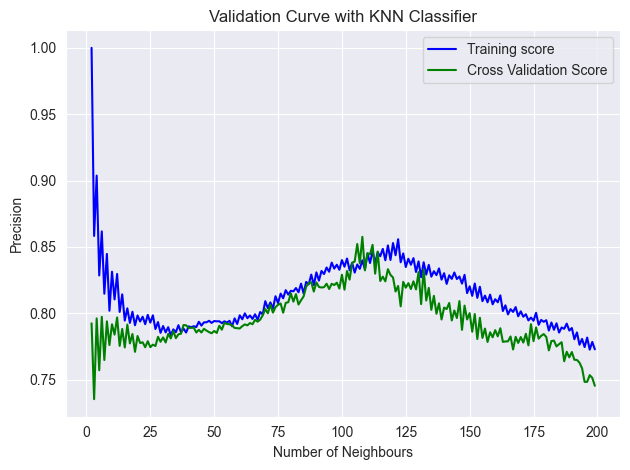

In [111]:
# plot the validation curve
knn_train_score_mean = np.mean(knn_train_score, axis=1)
knn_test_score_mean = np.mean(knn_test_score, axis=1)

sns.lineplot(x=param_range, y=knn_train_score_mean, 
             label='Training score', color='b')
sns.lineplot(x=param_range, y=knn_test_score_mean, 
             label='Cross Validation Score', color='g')

plt.title("Validation Curve with KNN Classifier")
plt.xlabel("Number of Neighbours")
plt.ylabel("Precision")
plt.tight_layout()

Zoom into 2 areas with the highest results - [1, 5] and [110, 120].

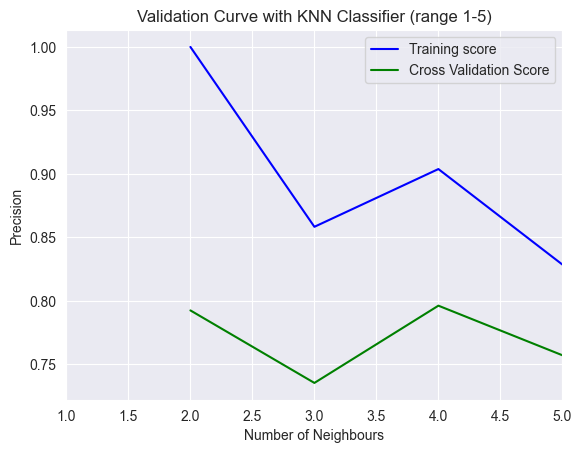

In [112]:
sns.lineplot(x=param_range, y=knn_train_score_mean, 
             label='Training score', color='b')
sns.lineplot(x=param_range, y=knn_test_score_mean, 
             label='Cross Validation Score', color='g')

plt.xlim([1, 5])

plt.title("Validation Curve with KNN Classifier (range 1-5)")
plt.xlabel("Number of Neighbours")
plt.ylabel("Precision")
plt.show()

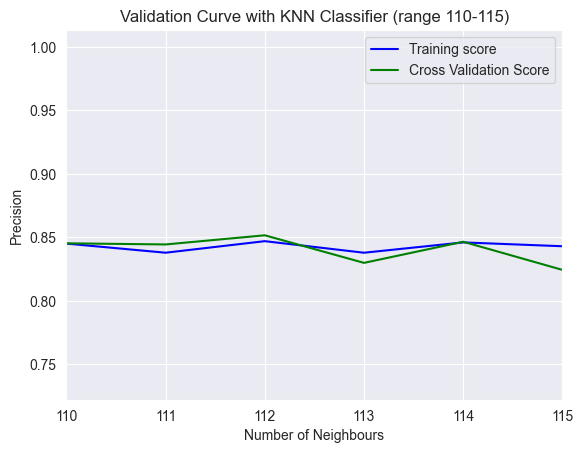

In [113]:
sns.lineplot(x=param_range, y=knn_train_score_mean, 
             label='Training score', color='b', ci=10)
sns.lineplot(x=param_range, y=knn_test_score_mean, 
             label='Cross Validation Score', color='g')

plt.xlim([110, 115])

plt.title("Validation Curve with KNN Classifier (range 110-115)")
plt.xlabel("Number of Neighbours")
plt.ylabel("Precision")
plt.show()

So, lets compare this values of neighbors on the testing set.

In [114]:
top_neighbors = list(range(1, 6)) + list(range(110, 116))

for neighbor in top_neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    score = precision_score(y_test, y_pred)
    print(f'KNN(n = {neighbor}) precision = {score:.2f}')


KNN(n = 1) precision = 0.70
KNN(n = 2) precision = 0.73
KNN(n = 3) precision = 0.73
KNN(n = 4) precision = 0.78
KNN(n = 5) precision = 0.75
KNN(n = 110) precision = 0.83
KNN(n = 111) precision = 0.82
KNN(n = 112) precision = 0.82
KNN(n = 113) precision = 0.82
KNN(n = 114) precision = 0.82
KNN(n = 115) precision = 0.82


As we can see through the results on testing data - despite the fact low values of neighbors were more effective at cross-validation, on the test set the perfomance of high number of neighbors was higher (precision 80%+). It is because on small number of neighbors model is underfitted.

All in all, the KNN model with hyperparameter n_neighbors = 110 has precision ~ 0.83 on test data. It means that this model can correctly predict high traffic recipes ~83% of the time.

## Tree Model

Let's compare KNN to the DecisionTreeClassifier(). Firstly we will validate various max_depth of a tree to rate it's perfomance.

In [115]:
param_range = range(1, X_train.shape[1])

tree_train_score, tree_test_score = validation_curve(DecisionTreeClassifier(),
                                           X_train, y_train,
                                           param_name = "max_depth",
                                           param_range = param_range,
                                           cv = 5, 
                                           scoring = "precision",
                                           n_jobs=-1)

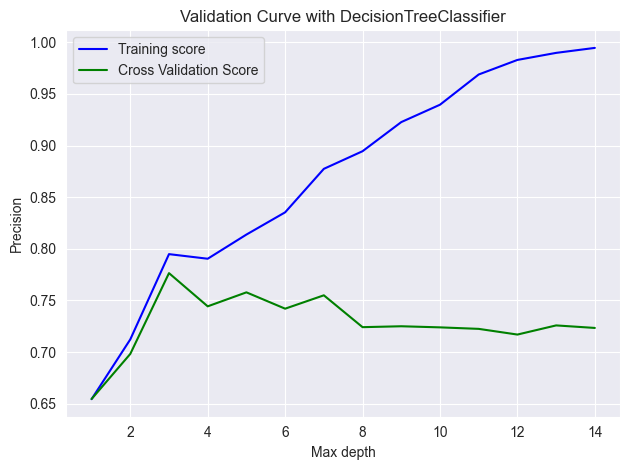

In [116]:
X_train.shape[1]# plot the validation curve
tree_train_score_mean = np.mean(tree_train_score, axis=1)
tree_test_score_mean = np.mean(tree_test_score, axis=1)

sns.lineplot(x=param_range, y=tree_train_score_mean, 
             label='Training score', color='b')
sns.lineplot(x=param_range, y=tree_test_score_mean, 
             label='Cross Validation Score', color='g')

plt.title("Validation Curve with DecisionTreeClassifier")
plt.xlabel("Max depth")
plt.ylabel("Precision")
plt.tight_layout()

Validation curve of a DecisionTreeClassifier shows that after max_depth = 3 our model start overfitting. We can try GridSearching other hyperparametrs.

In [117]:
tree_params = {
    'max_features': ['auto', 'sqrt', 'log2'],
    'ccp_alpha': np.arange(0.01, 0.11, 0.1),
    'max_depth' : range(1, 10),
    'criterion' :['gini', 'entropy']
}

tree_grid = GridSearchCV(DecisionTreeClassifier(random_state=1), 
                         param_grid=tree_params, 
                         cv=5,
                         scoring = 'precision',
                         n_jobs=-1)

tree_grid.fit(X_train, y_train);

In [118]:
print(f'Tree best params are {tree_grid.best_params_}')
print(f'Tree best precision = {tree_grid.best_score_}')

Tree best params are {'ccp_alpha': 0.01, 'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto'}
Tree best precision = 0.772652079942894


As we can see, basic DecisionTreeClassifier() model works _worse_ than KNeighborsClassifier.

## Random Forest Model

Last model will be random forest. May be it would be able to increase the perfomance of a single tree significantly.

In [119]:
rf_params = { 
    'n_estimators': range(50, 250, 15),
    'max_depth' : range(2, 6),
    'criterion' :['gini', 'entropy']
}

rf_grid = GridSearchCV(RandomForestClassifier(random_state=1), 
                         param_grid=rf_params, 
                         cv=5,
                         scoring = 'precision',
                         n_jobs=-1)

rf_grid.fit(X_train, y_train);

In [120]:
print(f'Random Forest best params are {rf_grid.best_params_}')
print(f'Random Forest precision = {rf_grid.best_score_}')

Random Forest best params are {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 245}
Random Forest precision = 0.7199455591452042


All in all, we have compared 3 different models - KNeighborsClassifier, DecisionTreeClassifier, RandomForestClassifier and KNN is the best for that data.

# Some recipes that will lead to high traffic

Let's find top 10 recipes for the Product Manager that have the highest probability to lead to high traffic.

In [168]:
# defining best model
best_model = KNeighborsClassifier(n_neighbors=110)
best_model.fit(X_train, y_train);

In [169]:
# predicting probablities
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

In [165]:
pred_recipes = pd.Series(data=y_pred_proba, 
                index=X_test_ind)

In [172]:
# top 10 recipes
pred_recipes.sort_values(ascending=False).index[:10].to_list()

[831, 762, 300, 813, 548, 578, 826, 829, 496, 827]

# Results

First of all, the goal of business is clear - to select the correct recipes for the homepage each day. A good recipe means more traffic at the site and therefore more subscriptions so this is really important to the company. For that purpose the KNN model was made with perfomance of 83% (KPI is precision that minimizes chances of showing unpopular recipes).

From that moment the business can use a ML model for choosing which recipes to display on the homepage each day.

## recommendation to the business

If we look at the proportion of high-traffic meals through categories the statistics is not uniform. Some categories ('vegetable', 'potato', 'pork', etc) have a lot of high-traffic meals, while some categories (as 'chiken', 'breakfast', 'beverages') do not have many popular recipes at all. If the situation does not change, it may cause a big class disbalance - only some categories will be popular and contain popular recipes, while all other meals from left categories will be unpopular and unsuitable for homepage. 

In brief, I recommend the business to improve the recipes of classes that have low proportion of high-traffic meals.

![Name](proportion.png)